<span style="color:blue">

## "네이버 뉴스 사이트"에서 특정 키워드로 검색 하는 프로그램
    
</span>

In [1]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')

### 함수 정의

In [2]:
# 해드라인 검색 및 추출 함수
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter로 받음

title_list = []

def web_scraping(keyword, end, start = 1):    # 시작 페이지의 default 값은 1
    while 1:

        if start > 10*end-9 :    # 다 찾으면 while 문을 빠져 나감 
            break        
        
        url ='https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&start={}'.format(keyword,start)

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')

        titles = page.find_all(attrs='news_tit')     # 헤드라인 기사를 가져옴 
        
        print(titles)    

        for one in titles:
            title_list.append(one.text)
            
        start += 10


### 위 함수를 호출

In [3]:
# 검색어를 입력 받음 

keyword = input('검색어를 입력하세요 : ')
end_page = input('마지막 페이지를 입력하세요 : ')
print()

web_scraping(keyword, int(end_page))


검색어를 입력하세요 : 인공지능
마지막 페이지를 입력하세요 : 10

[<a class="news_tit" href="http://autotimes.hankyung.com/apps/news.sub_view?popup=0&amp;nid=03&amp;c1=03&amp;c2=03&amp;c3=00&amp;nkey=202104230900461" onclick="return goOtherCR(this, 'a=nws*b.tit&amp;r=1&amp;i=880003F6_000000000000000000082012&amp;g=5029.0000082012&amp;u='+urlencode(this.href));" target="_blank" title="현대차그룹, 인공지능 전문가 자문위원 영입">현대차그룹, <mark>인공지능</mark> 전문가 자문위원 영입</a>, <a class="news_tit" href="http://yna.kr/AKR20210423091200065?did=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=6&amp;i=880000D8_000000000000000012349648&amp;g=001.0012349648&amp;u='+urlencode(this.href));" target="_blank" title="인하대, 인천 첫 인공지능 특화 연구교육기관 문열어">인하대, 인천 첫 <mark>인공지능</mark> 특화 연구교육기관 문열어</a>, <a class="news_tit" href="http://www.bzeronews.com/news/articleView.html?idxno=475387" onclick="return goOtherCR(this, 'a=nws*b.tit&amp;r=11&amp;i=88155e89_000000000000000000243044&amp;g=5324.0000243044&amp;u='+urlencode(this.href));" target="_blank" titl

[<a class="news_tit" href="http://www.etnews.com/20210422000017" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=1&amp;i=880000EA_000000000000000002940581&amp;g=030.0002940581&amp;u='+urlencode(this.href));" target="_blank" title="가비아, 구글 인공 지능(AI) 기반 '스마트 쇼핑 광고' 론칭…1개월 광고비 지원">가비아, 구글 <mark>인공 지능</mark>(AI) 기반 '스마트 쇼핑 광고' 론칭…1개월 광고비 지...</a>, <a class="news_tit" href="http://www.aitimes.kr/news/articleView.html?idxno=20841" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=2&amp;i=88202ra5_000000000000000000003264&amp;g=5830.0000003264&amp;u='+urlencode(this.href));" target="_blank" title="현대중공업그룹, 선박 내 화재 감시하는 인공지능 시스템 개발">현대중공업그룹, 선박 내 화재 감시하는 <mark>인공지능</mark> 시스템 개발</a>, <a class="news_tit" href="http://www.ilovepc.co.kr/news/articleView.html?idxno=38777" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=3&amp;i=88123FB8_000000000000000000024780&amp;g=5198.0000024780&amp;u='+urlencode(this.href));" target="_blank" title="[월드IT쇼 2021] SKT, 인공지능·메타버스 관련 기술 전시">[월드IT쇼 2021] SKT,

[<a class="news_tit" href="http://www.edaily.co.kr/news/newspath.asp?newsid=02525606629017760" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000E7_000000000000000004905675&amp;g=018.0004905675&amp;u='+urlencode(this.href));" target="_blank" title="신한은행, 인공지능 총괄에 삼성 출신 김민수 센터장 영입">신한은행, <mark>인공지능</mark> 총괄에 삼성 출신 김민수 센터장 영입</a>, <a class="news_tit" href="http://www.kgdm.co.kr/news/articleView.html?idxno=754341" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=4&amp;i=88185566_000000000000000000074432&amp;g=5654.0000074432&amp;u='+urlencode(this.href));" target="_blank" title="성남시 콜센터, 인공지능 상담 시범 도입 시행">성남시 콜센터, <mark>인공지능</mark> 상담 시범 도입 시행</a>, <a class="news_tit" href="http://www.fnnews.com/news/202104201413360671" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=5&amp;i=880000FF_000000000000000004623991&amp;g=014.0004623991&amp;u='+urlencode(this.href));" target="_blank" title="인공지능으로 살펴보는 도서 검색 서비스"><mark>인공지능</mark>으로 살펴보는 도서 검색 서비스</a>, <a class="news_tit" hre

[<a class="news_tit" href="http://www.joseilbo.com/news/news_read.php?uid=421707&amp;class=42&amp;grp=" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=1&amp;i=880000F1_000000000000000002244489&amp;g=123.0002244489&amp;u='+urlencode(this.href));" target="_blank" title='美·日정상 공동성명 "5G, 인공지능, 반도체 분야에 공동 투자"'>美·日정상 공동성명 "5G, <mark>인공지능</mark>, 반도체 분야에 공동 투자"</a>, <a class="news_tit" href="https://www.itbiznews.com/news/articleView.html?idxno=34960" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=2&amp;i=8819br2x_000000000000000000009716&amp;g=5795.0000009716&amp;u='+urlencode(this.href));" target="_blank" title="인공지능(AI) 산학연 협의체 'AI원팀'에 우리은행 합류"><mark>인공지능</mark>(AI) 산학연 협의체 'AI원팀'에 우리은행 합류</a>, <a class="news_tit" href="http://mbnmoney.mbn.co.kr/news/view?news_no=MM1004321956" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=3&amp;i=8817c9f8_000000000000000000113628&amp;g=5274.0000113628&amp;u='+urlencode(this.href));" target="_blank" title='KT 인공지능 산학연에 우리은행 가세…"금융권 최초"'>KT <mar

### 형태소 분석

In [5]:
kkma = Kkma()

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)


[[('현대', 'NNG'), ('차', 'NNG'), ('그룹', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('전문가', 'NNG'), ('자문', 'NNG'), ('위원', 'NNG'), ('영입', 'NNG')], [('인', 'NNG'), ('하대', 'NNG'), (',', 'SP'), ('인천', 'NNG'), ('첫', 'MDT'), ('인공지능', 'NNG'), ('특화', 'NNG'), ('연구', 'NNG'), ('교육', 'NNG'), ('기관', 'NNG'), ('문', 'NNG'), ('열', 'VV'), ('어', 'ECD')], [('충남', 'NNG'), ('교육청', 'NNG'), ('-', 'SW'), ('선', 'NNG'), ('문', 'NNG'), ('대', 'NNG'), ('손잡', 'VV'), ('고', 'ECE'), ('인공지능', 'NNG'), ('학생', 'NNG'), ('동아리', 'NNG'), ('지원', 'NNG')], [('아이', 'NNG'), ('반', 'NNG'), (',', 'SP'), ('새', 'MDT'), ('자', 'NNG'), ('작곡', 'NNG'), ('‘', 'SS'), ('인공지능', 'NNG'), ('’', 'SS'), ('콘셉트', 'NNG'), ('포토', 'NNG'), ('공개', 'NNG')], [('인공지능', 'NNG'), ('돌', 'NNG'), ('봄', 'NNG'), ('서비스', 'NNG'), ('나오', 'VV'), ('ㄴ다', 'ECS'), ('…', 'SE'), ('취약', 'NNG'), ('계층', 'NNG'), ('복지', 'NNG'), ('희망', 'NNG')], [('AI', 'OL'), ('타임스', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('오피니언', 'NNG'), ('페이지', 'NNG'), ('오픈', 'NNG')], [('"', 'SS'), ('인공지능', 'NNG'), ('강국', 'NN

### 명사 추출

In [6]:
noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NNG']:               
            noun_list.append(word)
            
print(noun_list)


['현대', '차', '그룹', '인공지능', '전문가', '자문', '위원', '영입', '인', '하대', '인천', '인공지능', '특화', '연구', '교육', '기관', '문', '충남', '교육청', '선', '문', '대', '인공지능', '학생', '동아리', '지원', '아이', '반', '자', '작곡', '인공지능', '콘셉트', '포토', '공개', '인공지능', '돌', '봄', '서비스', '취약', '계층', '복지', '희망', '타임스', '인공지능', '오피니언', '페이지', '오픈', '인공지능', '강국', '한국', '기술', '선진국', '기업', '현대', '차', '그룹', '인공지능', '석학', '조경', '현', '교수', '자문', '위원', '영입', '인공지능', '인재', '데이터', '라벨', '링', '교육', '포스', '코', '미래', '인재', '육성', '주니어', '인공지능', '온라인', '캠프', '교육', '논단', '사이버', '작전', '인공지능', '미', '국방', '분야', '추진', '동향', '인공지능', '규제', '안', '공개', '총', '상금', '사물', '인터넷', '인공지능', '건설', '기술', '경연', '아이', '반', '자', '작곡', '인공지능', '콘셉트', '포토', '공개', '인공지능', '선진', '행정', '아카데미', '운영', '쇼', '참가', '인공지능', '가상현실', '기술', '휘센', '시스템', '에어컨', '업계', '인공지능', '품질', '인증', '획득', '인공지능', '자동화', '설비', '투자', '전자', '휘센', '시스템', '에어컨', '인공지능', '품질', '인증', '획득', '보건', '의료', '데이터', '혁신', '포럼', '데이터', '인공지능', '혁신', '전략', '논의', '콜', '센터', '인공지능', '상담', '서비스', '도입', '과', '기부', '인공지능', '

### 두음절 이상 단어만 추출

In [7]:
print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어 추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 


▶ 전체 명사의 수 =  761

▶ 두음절 이상의 명사의 수 =  654

['현대', '그룹', '인공지능', '전문가', '자문', '위원', '영입', '하대', '인천', '인공지능', '특화', '연구', '교육', '기관', '충남', '교육청', '인공지능', '학생', '동아리', '지원', '아이', '작곡', '인공지능', '콘셉트', '포토', '공개', '인공지능', '서비스', '취약', '계층', '복지', '희망', '타임스', '인공지능', '오피니언', '페이지', '오픈', '인공지능', '강국', '한국', '기술', '선진국', '기업', '현대', '그룹', '인공지능', '석학', '조경', '교수', '자문', '위원', '영입', '인공지능', '인재', '데이터', '라벨', '교육', '포스', '미래', '인재', '육성', '주니어', '인공지능', '온라인', '캠프', '교육', '논단', '사이버', '작전', '인공지능', '국방', '분야', '추진', '동향', '인공지능', '규제', '공개', '상금', '사물', '인터넷', '인공지능', '건설', '기술', '경연', '아이', '작곡', '인공지능', '콘셉트', '포토', '공개', '인공지능', '선진', '행정', '아카데미', '운영', '참가', '인공지능', '가상현실', '기술', '휘센']


### 추출된 단어들의 출현 횟수를 확인

In [8]:
counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(words)


[('인공지능', 99), ('기술', 12), ('교육', 10), ('서비스', 9), ('데이터', 9), ('센터', 8), ('광주', 7), ('사업', 7), ('시스템', 6), ('혁신', 6), ('개발', 6), ('그룹', 5), ('지원', 5), ('한국', 5), ('분야', 5), ('운영', 5), ('협약', 5), ('현대', 4), ('영입', 4), ('포토', 4), ('공개', 4), ('인재', 4), ('활용', 4), ('분석', 4), ('업무', 4), ('산업', 4), ('솔루션', 4), ('은행', 4), ('교육청', 3), ('아이', 3), ('기업', 3), ('라벨', 3), ('육성', 3), ('인터넷', 3), ('건설', 3), ('의료', 3), ('상담', 3), ('도입', 3), ('대학원', 3), ('선정', 3), ('제공', 3), ('선도', 3), ('협회', 3), ('양성', 3), ('메타', 3), ('버스', 3), ('체결', 3), ('컨설팅', 3), ('실증', 3), ('공모', 3)]


###  word cloud 생성

{'인공지능': 99, '기술': 12, '교육': 10, '서비스': 9, '데이터': 9, '센터': 8, '광주': 7, '사업': 7, '시스템': 6, '혁신': 6, '개발': 6, '그룹': 5, '지원': 5, '한국': 5, '분야': 5, '운영': 5, '협약': 5, '현대': 4, '영입': 4, '포토': 4, '공개': 4, '인재': 4, '활용': 4, '분석': 4, '업무': 4, '산업': 4, '솔루션': 4, '은행': 4, '교육청': 3, '아이': 3, '기업': 3, '라벨': 3, '육성': 3, '인터넷': 3, '건설': 3, '의료': 3, '상담': 3, '도입': 3, '대학원': 3, '선정': 3, '제공': 3, '선도': 3, '협회': 3, '양성': 3, '메타': 3, '버스': 3, '체결': 3, '컨설팅': 3, '실증': 3, '공모': 3}


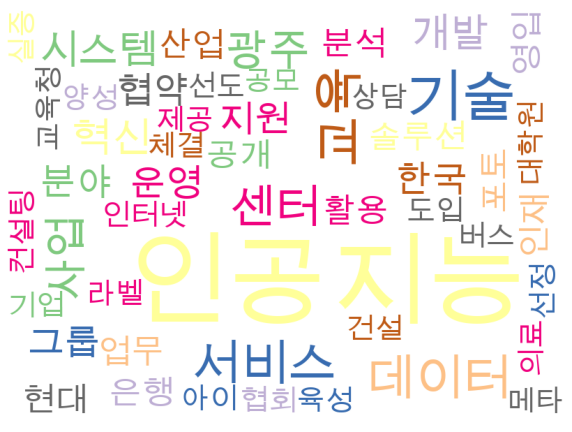

In [10]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                      background_color='white',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()
